## Time Series Foecasting using FaceBook PROPHET Algorithm (IIMC APDS Course Capstone Project)

### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fbprophet import Prophet
import os
from statsmodels.tsa.stattools import adfuller
import warnings
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
warnings.simplefilter(action='ignore', category=FutureWarning)


Importing plotly failed. Interactive plots will not work.
C:\Users\PARTHA\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Creating class for entire system

In [2]:
class Goldprice_Forecast:
    
# Gold price forecast using prophet   
# author-Partha Sarathi Chakraborty
# date-18/07/2020


    def __int__(self):
        self.data=data
        
    def preprocess_data(self,path_to_data,file_name):
        self.path_to_data=path_to_data
        self.file_name=file_name
        data=pd.read_csv(os.path.join(path_to_data,file_name))
        data['date']=pd.to_datetime(data['date'],format="%d-%m-%Y")
        data['ret_rup'] = data.rupee.pct_change(1)*100
        data.dropna(inplace=True)
        data=data.loc[:,['date','rupee','ret_rup']]
        train_series=data[(data['date']>='2015-01-01') & (data['date']<='2020-06-30')]
        test_series=data[data['date']>='2020-07-01']
        train_actual=train_series.loc[:,['date','rupee']]
        test_actual=test_series.loc[:,['date','rupee']]
        train_series=train_series.loc[:,['date','ret_rup']]
        test_series=test_series.loc[:,['date','ret_rup']]
        train_series.rename(columns={'date':'ds','ret_rup':'y'},inplace=True)
        test_series.rename(columns={'date':'ds','ret_rup':'y'},inplace=True)
        data=data.set_index('date')
        return data,train_series,train_actual,test_series,test_actual
        
    def plot_timeseries(self,data,feature):
        self.data=data
        self.feature=feature
        plt.figure(figsize=(10,4))
        data[feature].plot(color='blue')
        plt.xlabel('Date')
        plt.ylabel('Gold price')
        plt.title('Time series plot of gold price')
        plt.grid()
        plt.show()
        
    def decompose_timeseries(self,data,feature,method_for_decomposition,frequency):
        #method_for_decomposition-->"additive"/"multiplicative"
        self.data=data
        self.feature=feature
        self.method_for_decomposition=method_for_decomposition
        self.frequency=frequency
        decompose = seasonal_decompose(data[feature], model=method_for_decomposition, freq=frequency)
        decompose.plot()
        plt.show()
        
    def check_for_stationarity(self,data,feature,window):
        self.data=data
        self.feature=feature
        self.window=window
        plt.figure(figsize=(10,6))
        moving_avg = data[feature].rolling(window=window).mean() 
        std_dev = data[feature].rolling(window=window).std()
        actual_series = plt.plot(data[feature], color='orange',label='actual gold price')
        moving_average = plt.plot(moving_avg, color='green', label='moving average')
        std_dev_plot = plt.plot(std_dev, color='blue', label = 'standard deviation of moving average')
        plt.legend(loc='upper right')
        plt.title('Time series plot along with moving average of the series')
        plt.show()
        
    def ADF_test(self,data,feature):
        self.data=data
        self.feature=feature
        test_result = adfuller(data[feature])
        print('ADF Statistic: %f' % test_result[0])
        print('p-value: %f' % test_result[1])
        print('Critical Values:')
        for key, value in test_result[4].items():
            print('\t%s: %.3f' % (key, value))
        if test_result[1]<0.05:
            print("The series is stationary\n")
        else:
            print("The series is not stationary\n")
        
        
    def plot_ACF_PACF(self,data,feature):
        self.data=data
        self.feature=feature
        plot_acf(data[feature])
        plot_pacf(data[feature])
        plt.show()
        plt.show()
        
    def plot_lag_scatterplot(self,data,feature,lag):
        self.data=data
        self.feature=feature
        self.lag=lag
        values = pd.DataFrame(data[feature])
        lags = self.lag
        columns = [values]
        for i in range(1,(lags + 1)):
            columns.append(values.shift(i))
            dataframe = pd.concat(columns, axis=1)
            columns = ['t+1']
        for i in range(1,(lags + 1)):
            columns.append('t-' + str(i))
            dataframe.columns = columns
            plt.figure(1)
        for i in range(1,(lags + 1)):
            ax = pyplot.subplot(240 + i)
            ax.set_title('t+1 vs t-' + str(i))
            plt.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
            plt.show()
            
    def apply_prophet(self,path_to_data,file_name,feature_1,method_for_decomposition,frequency,window,feature_2,lag):
        '''
        path_to_data-> the path to local directory
        file_name->name of the csv file
        feaure_1->rupee
        method_for_decomposition->additive/multiplicative
        frequency-> integer value representing the frequncy of data dollection
        window-> integer value representing moving avergare window
        feature_2->y
        lag-> inteher value representing how much lag we want
        '''
        self.path_to_data=path_to_data
        self.file_name=file_name
        self.feature_1=feature_1
        self.method_for_decomposition=method_for_decomposition
        self.frequency=frequency
        self.window=window
        self.feature_2=feature_2
        self.lag=lag
        
        print("Reading and preprocessing data.........\n")
        data,train_series,train_actual,test_series,test_actual=self.preprocess_data(path_to_data,file_name)
        print("Data preprocessing is completed \n")
        
        print("plotting time series.........\n")
        self.plot_timeseries(data,feature_1)
        
        print("Time series decomposition.........\n")
        self.decompose_timeseries(data,feature_1,method_for_decomposition,frequency)
        
        print("Check for stationarity...........")
        self.check_for_stationarity(train_series,feature_2,window)
        
        print("Augmented-Dickey_Fuller test...........\n")
        self.ADF_test(train_series,feature_2)
        
        print("Plotting ACF and PACF...........\n")
        self.plot_ACF_PACF(train_series,feature_2)
        
        print("Fitting PROPHET model............\n")
        
        model = Prophet(daily_seasonality=True,weekly_seasonality=True,yearly_seasonality=True,seasonality_mode='multiplicative')
        model.fit(train_series)
        
        future_date = model.make_future_dataframe(periods=8,freq='B')
        forecasted_value=model.predict(future_date)
        print("Plotting the forecasted value............\n")
        fig1 = model.plot(forecasted_value,uncertainty=True,plot_cap=True)
        
        print("Plotting model component...........\n")
        fig2 = model.plot_components(forecasted_value)
        
        test_datapoints=test_series['y']
        forecast_datapoints=forecasted_value[forecasted_value['ds']>="2020-07-01"]['yhat']
        
        print("The root mean squared error of the model is :", np.sqrt(mean_squared_error(test_datapoints,forecast_datapoints)))
        
        print("Forcasting future values using the model...........\n")
        test_actual['ret_rup']=test_series['y']
        set_fc=forecasted_value[forecasted_value['ds']>="2020-07-01"].loc[:,['ds','yhat']]
        print("Test actual \n",test_actual)
        print("Forecasetd actual \n",set_fc)
        
        forecasted_goldprrice=[]
        for i,j in zip(test_actual.rupee,set_fc.yhat):
            rp=i*100
            rate_new=100-j
            new_price=rp/rate_new
            forecasted_goldprrice.append(new_price)
        print(len(forecasted_goldprrice))
        test_actual['Forecasted_GoldPrice']=forecasted_goldprrice
        test_actual.dropna(inplace=True)
        return model,test_actual
        
        

### Creating instance of the class

In [3]:
Apply_forecast=Goldprice_Forecast()

### Creating the model

Reading and preprocessing data.........

Data preprocessing is completed 

plotting time series.........



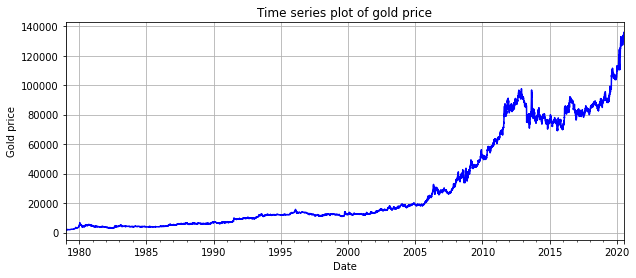

Time series decomposition.........



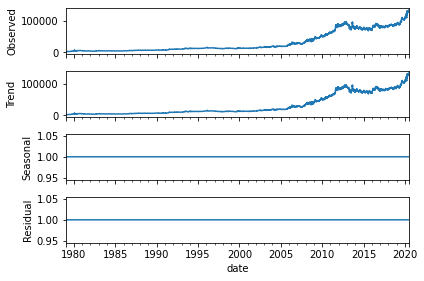

Check for stationarity...........


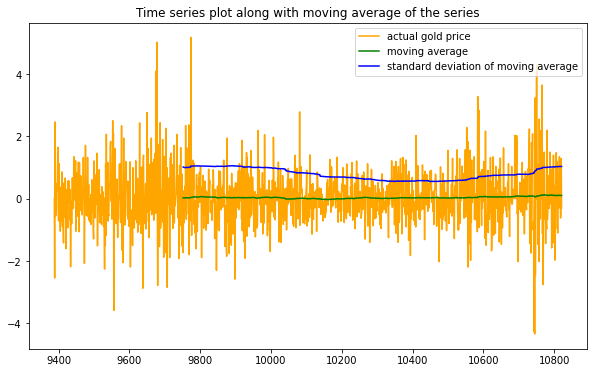

Augmented-Dickey_Fuller test...........

ADF Statistic: -38.629324
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
The series is stationary

Plotting ACF and PACF...........



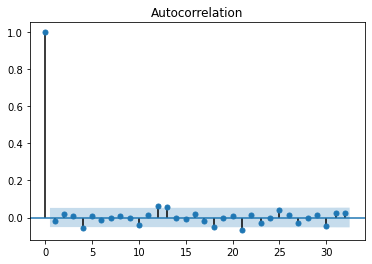

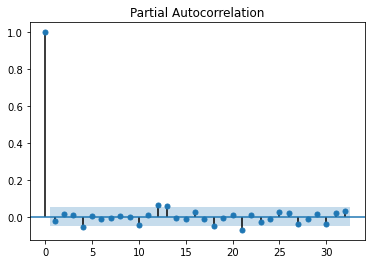

Fitting PROPHET model............

Plotting the forecasted value............

Plotting model component...........

The root mean squared error of the model is : 0.7199857855620106
Forcasting future values using the model...........

Test actual 
             date      rupee   ret_rup
10822 2020-07-01  133891.39  0.294536
10823 2020-07-02  133335.41 -0.415247
10824 2020-07-03  132324.81 -0.757938
10825 2020-07-06  133523.76  0.906066
10826 2020-07-07  134095.45  0.428156
10827 2020-07-08  135864.20  1.319023
10828 2020-07-09  135904.16  0.029412
10829 2020-07-10  135606.66 -0.218904
Forecasetd actual 
              ds      yhat
1434 2020-07-01 -0.121136
1435 2020-07-02 -0.002171
1436 2020-07-03 -0.256236
1437 2020-07-06  0.031999
1438 2020-07-07 -0.131609
1439 2020-07-08 -0.245914
1440 2020-07-09 -0.095593
1441 2020-07-10 -0.318560
8


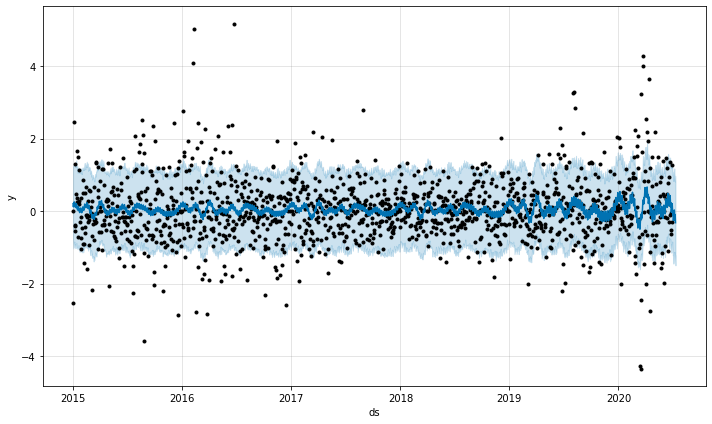

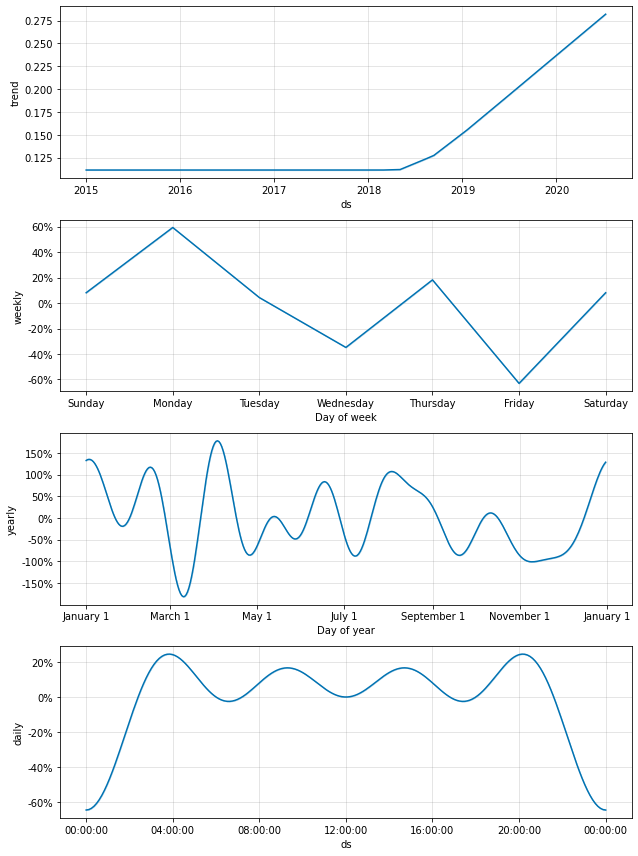

In [4]:
model,forecasted_data=Apply_forecast.apply_prophet('D:\IIMC APDS','d_data_complete.csv','rupee','multiplicative',1,365,'y',7)

In [5]:
forecasted_data

,date,rupee,ret_rup,Forecasted_GoldPrice
10822,2020-07-01,133891.39,0.294536,133729.395402
10823,2020-07-02,133335.41,-0.415247,133332.516006
10824,2020-07-03,132324.81,-0.757938,131986.612504
10825,2020-07-06,133523.76,0.906066,133566.499566
10826,2020-07-07,134095.45,0.428156,133919.199814
10827,2020-07-08,135864.20,1.319023,135530.910701
10828,2020-07-09,135904.16,0.029412,135774.369204
10829,2020-07-10,135606.66,-0.218904,135176.042869


### Plotting the actual vs forecasted gold price

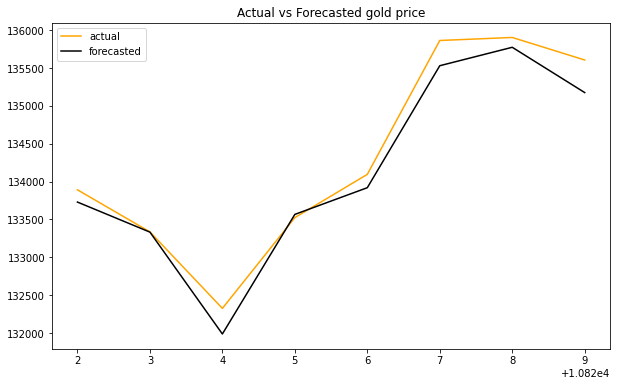

In [6]:
plt.figure(figsize=(10,6))
plt.plot(forecasted_data['rupee'],color='orange',label='actual')
plt.plot(forecasted_data['Forecasted_GoldPrice'],color='black',label='forecasted')
plt.title("Actual vs Forecasted gold price")
plt.legend(loc='upper left')
plt.show()

In [7]:
print("The root mean square value is {} :".format(np.sqrt(mean_squared_error(forecasted_data['rupee'],forecasted_data['Forecasted_GoldPrice']))))

The root mean square value is 246.69756038248462 :


In [8]:
print("The root mean square value is {} %:".format(np.mean(abs((forecasted_data['rupee']-forecasted_data['Forecasted_GoldPrice'])/forecasted_data['rupee'])*100)))

The root mean square value is 0.1500684552016211 %:
